This Project introduces few key concepts in Machine Learning - Non Linear Transformation, Overfitting, Underfitting, Regularization 

<IPython.core.display.Javascript object>


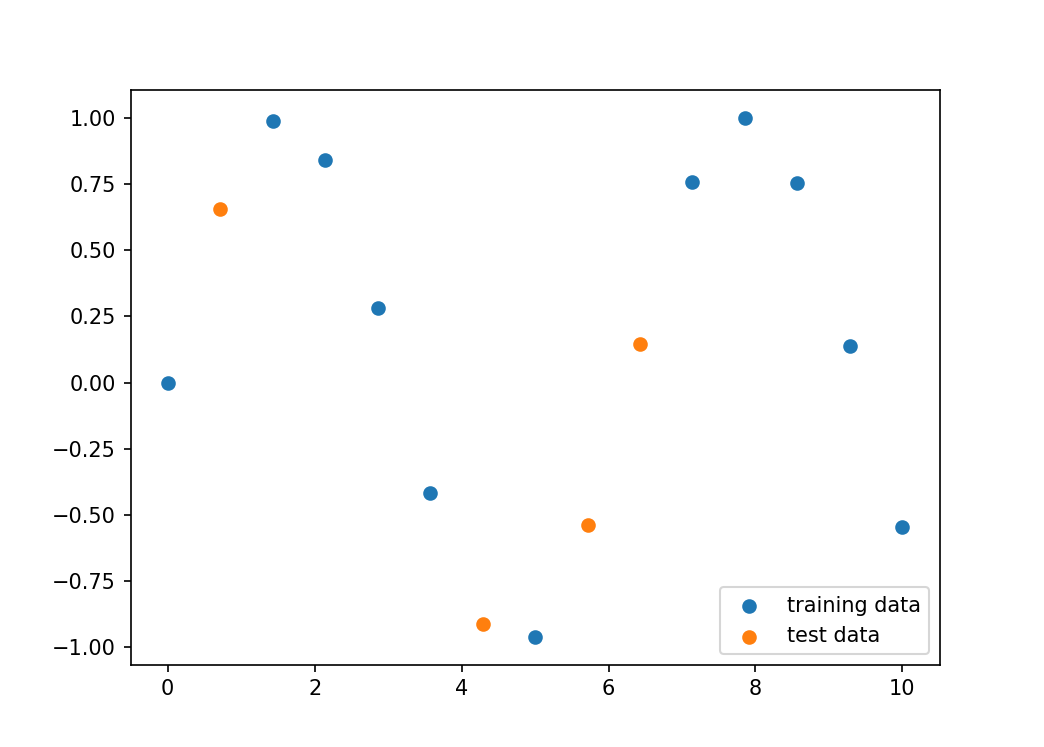

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(0)
n = 15

x = np.linspace(0,10,n) 
y = np.sin(x) 

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

#You can use this function to help you visualize the dataset by plotting a scatterplot of the data points in the training and test sets.
def part1_scatter():
    %matplotlib notebook
    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);

part1_scatter()


Fit the above data using Polynomial Linear Regression Model for degrees 1,3,6,9
The key steps in Non Linear Transformation are 
    1.Transform the training and test data in to the z-space 
    2.Train a model in z-space
    3.Use Linear Regression in z-space and predict the outcome
    

Explanation of Polynomial Features from http://scikit-learn.org

Generate polynomial and interaction features.

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

<IPython.core.display.Javascript object>


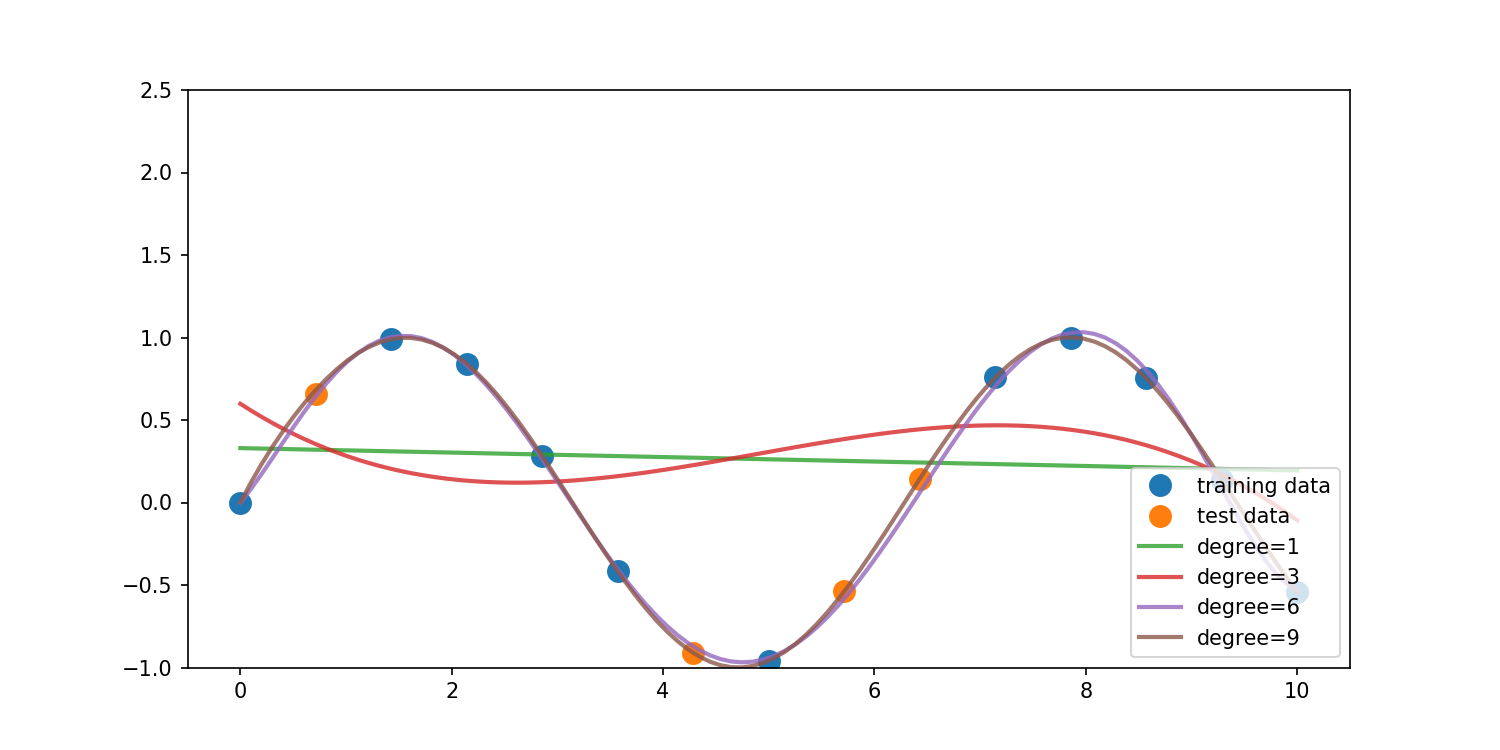

In [12]:
def Polynomial_Regression():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    
    x=np.linspace(0,10,100)
    x.shape=(len(x),1)
    X_train.shape=(len(X_train),1)
      
    for i in (1,3,6,9):
        poly = PolynomialFeatures(degree=i)
        XP_train=poly.fit_transform(X_train)
        XP_predict=poly.fit_transform(x)
        linreg =LinearRegression().fit(XP_train, y_train)
        y=linreg.predict(XP_predict)
        y.shape=(len(y),1)
        if i==1:
            yfinal=y.transpose()
        else:
            yfinal=np.append(yfinal,y.transpose(),axis=0)
    return  yfinal

def plot_one(degree_predictions):
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(Polynomial_Regression())

Take a look at Coefficient of determination /R-Squared(R^2) to determine the goodness of the fit of a model ; Identify the following information from the statistic

 1. what degree level corresponds to a model that is underfitting? 
 2. What degree level corresponds to a model that is overfitting? 
 3. What choice of degree level would provide a model with good generalization performance on this dataset?

In [29]:
def Coefficient_of_determination():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics.regression import r2_score
    
    X_train.shape=(len(X_train),1)
    X_test.shape=(len(X_test),1)
    initialize=0
    
    for i in range(0,10):    
        poly = PolynomialFeatures(degree=i)
        XP_train=poly.fit_transform(X_train)
        XP_test=poly.fit_transform(X_test)
    
        linreg =LinearRegression().fit(XP_train, y_train)
        yp_trainpredict=linreg.predict(XP_train)
        yp_testpredict=linreg.predict(XP_test)
        scoretrain=r2_score(y_train,yp_trainpredict)
        scoretest=r2_score(y_test,yp_testpredict)
        if initialize==0:
            r2_train=scoretrain
            r2_test=scoretest
            initialize=1
        else:
            r2_train=np.append(r2_train,scoretrain)
            r2_test=np.append(r2_test,scoretest)
    
    print('Coefficient of determination for TRAINING data for degrees 0 through 9:',r2_train,'\n')
    print('Coefficient of determination for TEST data for degrees 0 through 9:',r2_test,'\n')
    print('The degree corresponding to Underfitting:',r2_train.argmin(),'\n')
    print('The degree corresponding to Overfitting:',r2_train.argmax(),'\n')
    print('The degree corresponding to Good Generalization:',r2_test.argmax())
    
    

Coefficient_of_determination()

Coefficient of determination for TRAINING data for degrees 0 through 9: [ 0.          0.00484075  0.00496204  0.08551933  0.87401444  0.92815485
  0.99784717  0.99935127  0.99999485  0.99999918] 

Coefficient of determination for TEST data for degrees 0 through 9: [-0.48339724 -0.46481983 -0.49401354 -0.58788474  0.84554316  0.73938925
  0.99264647  0.98300456  0.99988496  0.99948695] 

The degree corresponding to Underfitting: 0 

The degree corresponding to Overfitting: 9 

The degree corresponding to Good Generalization: 8


Get in to the concept of Regularization

Training models on high degree polynomial features can result in overly complex models that overfit, so we often use regularized versions of the model to constrain model complexity, as we saw with Ridge and Lasso linear regression

Train two models: a non-regularized LinearRegression model (default parameters) and a regularized Lasso Regression model (with parameters alpha=0.01, max_iter=10000) on polynomial features of degree 12. Return the  R2R2  score for both the LinearRegression and Lasso model's test sets

In [34]:
def regularized_model():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso, LinearRegression
    from sklearn.metrics.regression import r2_score
    
    X_train.shape=(len(X_train),1)
    X_test.shape=(len(X_test),1)
    
    poly = PolynomialFeatures(degree=12)
    XP_train=poly.fit_transform(X_train)
    XP_test=poly.fit_transform(X_test)
    linreg =LinearRegression().fit(XP_train, y_train)
    yp_testpredict=linreg.predict(XP_test)
    LinearRegression_R2_test_score=r2_score(y_test,yp_testpredict)
    
    linlasso = Lasso(alpha=0.01, max_iter = 10000).fit(XP_train, y_train)
    yp_lassotestpredict=linlasso.predict(XP_test)
    Lasso_R2_test_score=r2_score(y_test,yp_lassotestpredict)

    print('Coefficient of determination for Linear Regression Model:',LinearRegression_R2_test_score)
    print('Coefficient of determination for Lasso Regression Model:',Lasso_R2_test_score)
    

regularized_model()

Coefficient of determination for Linear Regression Model: 0.999633118134
Coefficient of determination for Lasso Regression Model: 0.92876392155


C:\Users\rajesh.unnikrishnan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
